<a href="https://colab.research.google.com/github/shree-bot/Iris_Flower_Classification/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Classification: Iris Flower**

> *by Shree Ram*

Performed **exploratory data analysis**

I Tried four different classification algorithms:
1. Decision Tree
2. Random Forest Classifier
3. Gaussian Naive Bayes  
4. Logistic Regression

*Evaluation metric:* **accuracy** and **cross_val_score** (with **StratifiedKFold**)


## *Step 1*: **Importing necessary libraries**

In [3]:
!pip install git+https://github.com/scikit-optimize/scikit-optimize.git

  Cloning https://github.com/scikit-optimize/scikit-optimize.git to /tmp/pip-req-build-i3si6lq2
  Running command git clone -q https://github.com/scikit-optimize/scikit-optimize.git /tmp/pip-req-build-i3si6lq2
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached pyaml-21.8.3-py2.py3-none-any.whl (17 kB)
  Created wheel for scikit-optimize: filename=scikit_optimize-0.9.dev0-py2.py3-none-any.whl size=100309 sha256=5630107a6b0edd5b31edcc553fd16f91c834981df079a9f0609b8f6aee5eaee2
  Stored in directory: /tmp/pip-ephem-wheel-cache-cmvp8_et/wheels/d6/9e/e3/8818f5597f06caa60393811f8aa57eb87b8565d772046d1b72
Successfully built scikit-optimize


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, validation_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from skopt import BayesSearchCV

import warnings
warnings.simplefilter('ignore')

## *Step 2*: **Importing the dataset from drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## *Step 2*: **Loading the dataset**

In [5]:
import pandas as pd
path="/content/drive/MyDrive/iris.csv"
dataset=pd.read_csv(path)

dataset.head(5)

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
dataset.drop("Unnamed: 0",axis=1, inplace = True)
dataset.head(5)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
dataset.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
dataset.groupby('Species').size()

Species
setosa        50
versicolor    50
virginica     50
dtype: int64

In [9]:
dataset_X = dataset[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
dataset_Y = dataset.Species

features=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']
ftrnames = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
cn = ['setosa','versicolor','virginica']

## *Step 3*: **Exploratory Data Analysis**



### ***Histogram***
To check for symmetry and skewness in data. Gives us an overall idea of maximum and minimum values of features. 

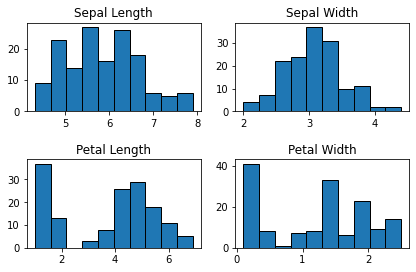

In [10]:
fig,axs = plt.subplots(2,2)
axs[0,0].hist(dataset['Sepal.Length'], edgecolor = 'black', linewidth = 1)
axs[0,0].set_title('Sepal Length')
axs[0,1].hist(dataset['Sepal.Width'], edgecolor = 'black', linewidth = 1)
axs[0,1].set_title('Sepal Width')
axs[1,0].hist(dataset['Petal.Length'], edgecolor = 'black', linewidth = 1)
axs[1,0].set_title('Petal Length')
axs[1,1].hist(dataset['Petal.Width'], edgecolor = 'black', linewidth = 1)
axs[1,1].set_title('Petal Width')

fig.tight_layout(pad = 1.5)

### ***Boxplots*** 
Helps to identify outliers, if present

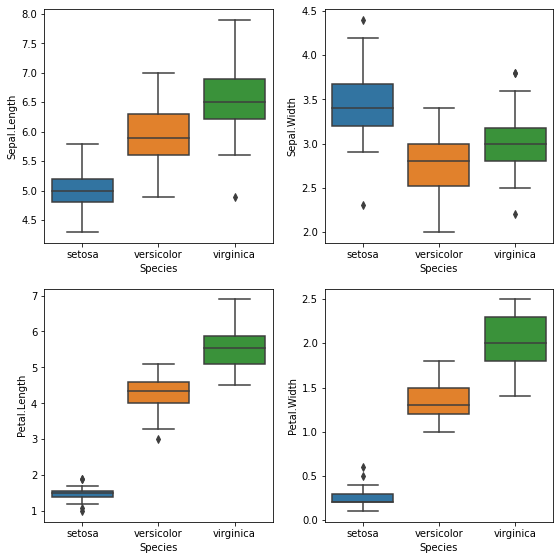

In [11]:
fig,axs = plt.subplots(2,2,figsize=(8,8))

sns.boxplot(x = 'Species', y = 'Sepal.Length', data = dataset, order = cn, ax = axs[0,0])
sns.boxplot(x = 'Species', y = 'Sepal.Width', data = dataset, order = cn, ax = axs[0,1])
sns.boxplot(x = 'Species', y = 'Petal.Length', data = dataset, order = cn, ax = axs[1,0])
sns.boxplot(x = 'Species', y = 'Petal.Width', data = dataset, order = cn, ax = axs[1,1])

fig.tight_layout(pad=1.5)

### ***Violin Plots***
TO Shows distribution within preset classes - Setosa, Versicolor and Virginica.


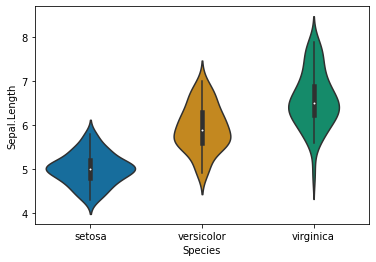

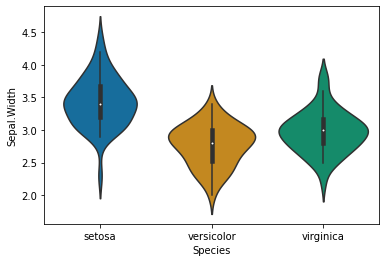

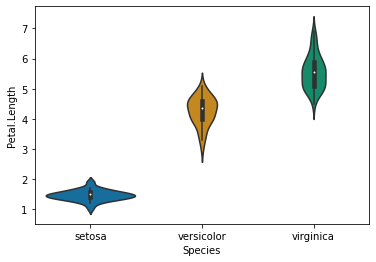

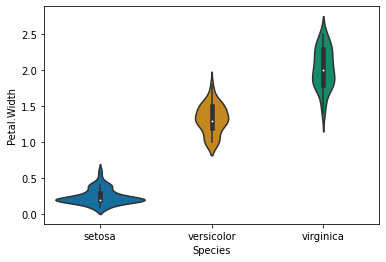

In [12]:
for feature in features:
  sns.violinplot(x="Species", y = feature, data = dataset,order=cn,palette='colorblind')
  plt.show()

### ***Pairs Plots***
To see both distribution of single variables and relationships between two variables

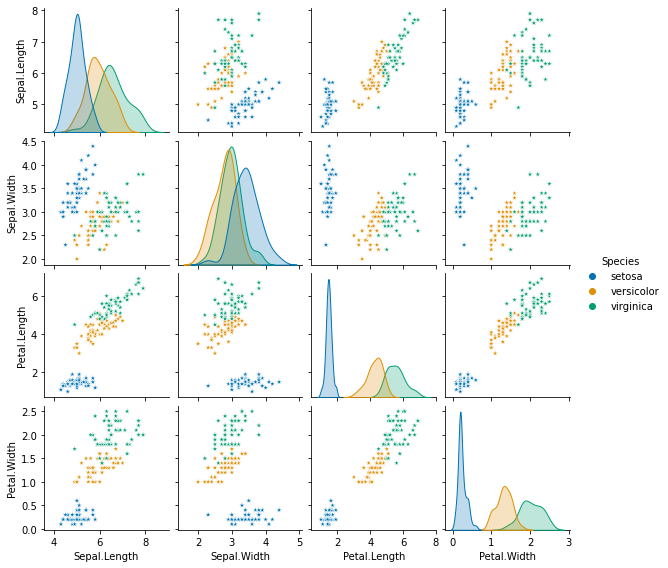

In [13]:
sns.pairplot(dataset, hue = "Species", height =2,markers="*", palette="colorblind")
plt.show()

### ***Heat Map***
TO clearly highlight the correlation values of the different features

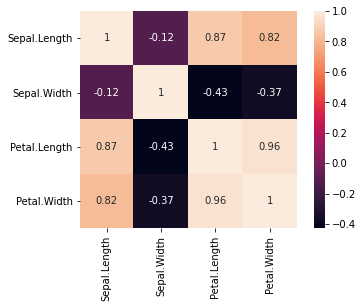

In [14]:
corrmat = dataset.corr()
sns.heatmap(corrmat,square = True, annot= True)

## *Step 4*: **Splitting dataset into train & test set**



In [15]:
train, test = train_test_split(dataset,test_size=0.3,stratify = dataset['Species'], random_state=21)

In [16]:
print(train.shape)

(105, 5)


In [19]:
print(test.shape)

(45, 5)


## *Step 5*: **Training different models**

### *Model 1*: Decision Tree


In [20]:
train_X = train[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
train_Y = train.Species

test_X = test[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']]
test_Y = test.Species

skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=1)

In [21]:
mod_dt = DecisionTreeClassifier(max_depth = 3)
mod_dt.fit(train_X,train_Y)
prediction = mod_dt.predict(test_X)
print('The accuracy of the Decision Tree is',"{:.5f}".format(metrics.accuracy_score(prediction,test_Y)))

The accuracy of the Decision Tree is 0.95556


In [22]:
mod_dt.feature_importances_

array([0.        , 0.        , 0.41601732, 0.58398268])

[Text(209.25, 380.52, 'Petal Width <= 0.8\ngini = 0.667\nsamples = 105\nvalue = [35, 35, 35]\nclass = setosa'),
 Text(139.5, 271.8, 'gini = 0.0\nsamples = 35\nvalue = [35, 0, 0]\nclass = setosa'),
 Text(279.0, 271.8, 'Petal Length <= 4.85\ngini = 0.5\nsamples = 70\nvalue = [0, 35, 35]\nclass = versicolor'),
 Text(139.5, 163.07999999999998, 'Petal Width <= 1.65\ngini = 0.108\nsamples = 35\nvalue = [0, 33, 2]\nclass = versicolor'),
 Text(69.75, 54.360000000000014, 'gini = 0.0\nsamples = 32\nvalue = [0, 32, 0]\nclass = versicolor'),
 Text(209.25, 54.360000000000014, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(418.5, 163.07999999999998, 'Petal Width <= 1.75\ngini = 0.108\nsamples = 35\nvalue = [0, 2, 33]\nclass = virginica'),
 Text(348.75, 54.360000000000014, 'gini = 0.444\nsamples = 6\nvalue = [0, 2, 4]\nclass = virginica'),
 Text(488.25, 54.360000000000014, 'gini = 0.0\nsamples = 29\nvalue = [0, 0, 29]\nclass = virginica')]

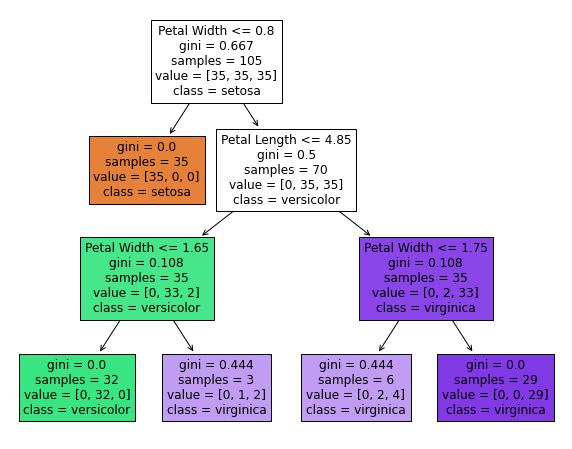

In [23]:
plt.figure(figsize=(10,8))
plot_tree(mod_dt,feature_names=ftrnames,class_names=cn,filled=True)

### *Model 2*: Random Forest Classifier


Text(0.5, 1.0, 'Decision Tree Confusion Matrix, without normalization')

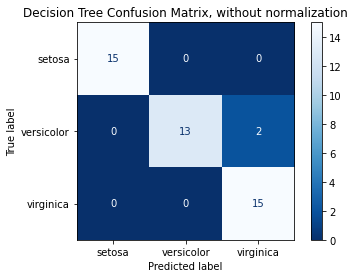

In [24]:
disp = metrics.plot_confusion_matrix(mod_dt, test_X, test_Y, display_labels=cn, cmap = plt.cm.Blues_r,normalize=None)
disp.ax_.set_title('Decision Tree Confusion Matrix, without normalization')

### *Model 3*: Gaussian Naive Bayes

In [25]:
clf = RandomForestClassifier(n_estimators=500,max_depth=3)
clf.fit(train_X,train_Y)

predictions_clf = clf.predict(test_X)
print('The accuracy of the Random Forest Classifier is',"{:.5f}".format(metrics.accuracy_score(predictions_clf,test_Y)))

The accuracy of the Random Forest Classifier is 0.97778


In [26]:
feature_imp = pd.Series(clf.feature_importances_,index=ftrnames).sort_values(ascending=False)
feature_imp

Petal Length    0.452018
Petal Width     0.435176
Sepal Length    0.102813
Sepal Width     0.009993
dtype: float64

Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix')

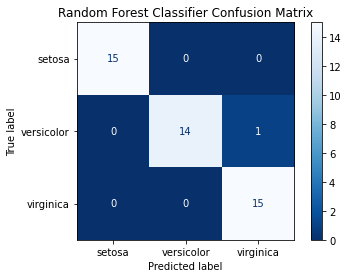

In [27]:
disp = metrics.plot_confusion_matrix(clf, test_X, test_Y, display_labels=cn, cmap = plt.cm.Blues_r)
disp.ax_.set_title('Random Forest Classifier Confusion Matrix')

### *Model 4*: Logistic Regression

In [28]:
gaussian = GaussianNB()
gaussian.fit(train_X, train_Y)
prediction_gnb = gaussian.predict(test_X)
print('The accuracy of the Gaussian Naive Bayes Classifier is',"{:.5f}".format(metrics.accuracy_score(prediction_gnb,test_Y)))


The accuracy of the Gaussian Naive Bayes Classifier is 0.97778


Text(0.5, 1.0, 'Gaussian Naive Bayes Confusion Matrix')

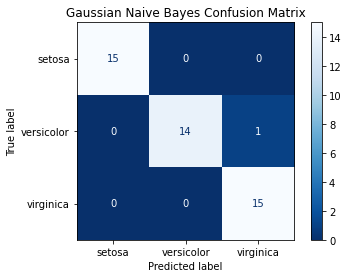

In [29]:
disp = metrics.plot_confusion_matrix(gaussian, test_X, test_Y, display_labels=cn, cmap = plt.cm.Blues_r)
disp.ax_.set_title('Gaussian Naive Bayes Confusion Matrix')

In [33]:
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(train_X,train_Y)
prediction_logreg = logreg.predict(test_X)
print('The accuracy of Logistic Regression is',"{:.5f}".format(metrics.accuracy_score(prediction_logreg,test_Y)))

The accuracy of Logistic Regression is 0.97778


Text(0.5, 1.0, 'Logistic Regression (One v/s all) Confusion Matrix')

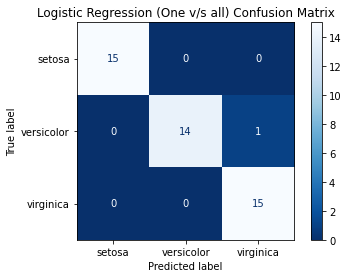

In [34]:
disp = metrics.plot_confusion_matrix(logreg, test_X,test_Y,display_labels=cn,cmap = plt.cm.Blues_r)
disp.ax_.set_title("Logistic Regression (One v/s all) Confusion Matrix")

## *Step 6*: **Further Selection**



In [35]:
models=[]
models.append(('Decision Tree',DecisionTreeClassifier(max_depth=3)))
models.append(('Random Forest Classifier',RandomForestClassifier(n_estimators=150, max_depth=3)))
models.append(('Gaussian Naive Bayes',GaussianNB()))
models.append(('Logistic Regression',LogisticRegression(solver='lbfgs',max_iter=10000)))

In [36]:
results=[]
for name,model in models:
  skf = StratifiedKFold(n_splits=10, shuffle = True,random_state=1)
  score = cross_val_score(model,dataset_X,dataset_Y,cv=skf,n_jobs=1)
  results.append((name,score))

In [37]:
for name,result in results:
  print(f"{name}: {result.mean():.4f}")

Decision Tree: 0.9533
Random Forest Classifier: 0.9533
Gaussian Naive Bayes: 0.9600
Logistic Regression: 0.9600


##**Conclusion**
Gaussian Naive Bayes and Logistic Regression performs the best, based on both cross_val_score and accuracy